In [1]:
import torch
from utils import device # detects whether you are using CPU or GPU
import matplotlib.pyplot as plt
from cust_plot import plot_rewards, plot_success, plot_mu, plot_sig
import numpy as np
import glob, os
import re

In [2]:
import pandas as pd

In [3]:
def process_brainexperiment(brain,exp, batch, n_av=1000):
    file = f"./R{exp:02}_sl_ns_{brain}_{batch}.pt"
    if os.path.isfile(file):
        tr_data = torch.load(file, map_location=device)
        reward_list = tr_data['rewards']
        success_list = tr_data['success']
        mu_list = tr_data['mu']
        mu_scale = abs(np.array(mu_list)).sum(axis=0)
        mu_list = mu_list / mu_scale
        sigma_list = tr_data['sig']
        sigma_list = sigma_list / mu_scale
        
        reward_mean = np.mean(reward_list[-n_av:])
        success_mean = np.mean(success_list[-n_av:])
        mu_mean = np.mean(mu_list[:][-n_av:],axis=1)
        sigma_mean = np.mean(sigma_list[:][-n_av:],axis=1) 
        return [reward_mean,success_mean,mu_mean,sigma_mean]
    else:
        return [np.NaN,np.NaN,[],[]]

In [4]:
criteria = ['streamlines','node_str','target_node','target_region','hub','neighbour_just_visited_node','edge_con_diff_region','inter_regional_connections','prev_visited_region','target_func_region','edge_con_diff_func_region','prev_visited_func_region']

In [5]:
def process_brain(brain,batch,n_av = 1000):
    results = [process_brainexperiment(brain, exp, batch, n_av) for exp in range(1,14)]
    return results

In [6]:
def get_brain_efficiencies(brain, batch, n_av = 1000):
    results = process_brain(brain,batch, n_av)
    efficiencies = np.array([r[0] for r in results])
    scaledefficiencies = 1 - efficiencies/efficiencies[0]
    return {criteria[i]: v  for (i,v) in enumerate(scaledefficiencies[1:])}

In [7]:
def process_batch(batch):
    flist = glob.glob(f"./R*{batch}.pt")
    brainlist = np.unique(np.sort([int(re.findall(r'\d+',file)[1]) for file in flist]))
    efficiencies = {}
    for brain in brainlist:
        efficiencies[brain] = get_brain_efficiencies(brain,batch)
    return efficiencies

In [8]:
def compare_brain_by_batch(brain):
    flist = glob.glob(f"./R*_{brain}_*.pt")
    batchlist = np.unique(np.sort([int(re.findall(r'\d+',file)[2]) for file in flist]))
    efficiencies = {}
    for batch in batchlist:
        efficiencies[batch] = get_brain_efficiencies(brain,batch)
    return efficiencies

In [11]:
def compare_everything():
    flist = glob.glob(f"./R*_99.pt")
    batchlist = np.unique(np.sort([int(re.findall(r'\d+',file)[2]) for file in flist]))
    print(batchlist)
    efficiencies = {}
    for batch in batchlist:
        print(batch)
        efficiencies[batch] = process_batch(batch)
    return efficiencies

In [12]:
results = compare_everything()

[99]
99


In [13]:
res = {k:pd.DataFrame(results[k]) for k in results}

In [15]:
pd.MultiIndex.from_arrays([[99]*len(res[99].columns),res[99].columns])

MultiIndex([(99,   1),
            (99,   2),
            (99,   3),
            (99,   4),
            (99,   5),
            (99,   6),
            (99,   7),
            (99,   8),
            (99,   9),
            (99,  10),
            ...
            (99, 153),
            (99, 154),
            (99, 155),
            (99, 156),
            (99, 157),
            (99, 158),
            (99, 159),
            (99, 160),
            (99, 161),
            (99, 162)],
           length=162)

In [ ]:
#res[94].shoae

In [16]:
[res[99].columns]

[Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
             ...
             153, 154, 155, 156, 157, 158, 159, 160, 161, 162],
            dtype='int64', length=162)]

In [17]:
pd.MultiIndex.from_arrays([res[99].columns]*3)

MultiIndex([(  1,   1,   1),
            (  2,   2,   2),
            (  3,   3,   3),
            (  4,   4,   4),
            (  5,   5,   5),
            (  6,   6,   6),
            (  7,   7,   7),
            (  8,   8,   8),
            (  9,   9,   9),
            ( 10,  10,  10),
            ...
            (153, 153, 153),
            (154, 154, 154),
            (155, 155, 155),
            (156, 156, 156),
            (157, 157, 157),
            (158, 158, 158),
            (159, 159, 159),
            (160, 160, 160),
            (161, 161, 161),
            (162, 162, 162)],
           length=162)

In [18]:
for k in res:
    head = pd.MultiIndex.from_arrays([[k]*res[k].shape[1],res[k].columns])
    res[k].columns = head

In [19]:
df = pd.concat([res[k] for k in res],axis=1)

In [20]:
# access Brain 3:
df.loc(axis=1)[:,3]

,99
,3
streamlines,0.009250
node_str,-0.050386
target_node,0.221734
target_region,0.073695
hub,0.001013
neighbour_just_visited_node,0.017224
edge_con_diff_region,-0.042082
inter_regional_connections,0.112960
prev_visited_region,0.009388


In [21]:
# Access Batch 95:
df.loc(axis=1)[99,:]

99                                          \
                                  1         2         3         4         5     
streamlines                 -0.009907  0.006199  0.009250 -0.024031  0.094346   
node_str                     0.011383  0.047122 -0.050386  0.020800  0.003180   
target_node                  0.198404  0.213141  0.221734  0.219383  0.227990   
target_region                0.078411  0.120013  0.073695  0.088685  0.151752   
hub                          0.124582  0.004683  0.001013  0.000597 -0.027771   
neighbour_just_visited_node  0.074724  0.054084  0.017224  0.009237 -0.035576   
edge_con_diff_region        -0.046074  0.047367 -0.042082  0.001192 -0.034444   
inter_regional_connections   0.035332  0.090011  0.112960  0.051666  0.014177   
prev_visited_region         -0.010146  0.049119  0.009388  0.002140  0.009586   
target_func_region           0.615838  0.035014  0.000520  0.027353  0.014920   
edge_con_diff_func_region   -0.014397 -0.018341  0.004127 -0.005381 -0.040696   
prev_visited_func_region    -0.013378  0.043232  0.014971 -0.002115  0.002112   

                                                                               \
                                  6         7         8         9         10    
streamlines                  0.010706  0.028557 -0.088787  0.028302  0.014311   
node_str                    -0.013456 -0.004250 -0.075807  0.008269 -0.008203   
target_node                  0.188312  0.459827  0.195738  0.203828  0.247975   
target_region                0.075743  0.086793  0.063382  0.736504  0.066124   
hub                          0.001490 -0.025024 -0.094258 -0.004719  0.001143   
neighbour_just_visited_node -0.013535  0.002673 -0.057989  0.012231  0.160385   
edge_con_diff_region         0.006903 -0.001957 -0.092111  0.002889 -0.023812   
inter_regional_connections   0.050984  0.071097  0.020162  0.049247  0.047879   
prev_visited_region          0.032655  0.031431  0.031450 -0.004284  0.001061   
target_func_region           0.015960  0.121230 -0.014914  0.170633 -0.024602   
edge_con_diff_func_region    0.003850 -0.015541 -0.053367 -0.007990 -0.002607   
prev_visited_func_region    -0.000690 -0.009899 -0.017682 -0.059152 -0.032244   

                             ...                                          \
                             ...       153       154       155       156   
streamlines                  ...  0.021811  0.002555 -0.053412  0.043819   
node_str                     ...  0.027390 -0.038325 -0.009328  0.039638   
target_node                  ...  0.211983  0.289207  0.159887  0.206924   
target_region                ...  0.023904  0.090796  0.075696  0.092917   
hub                          ... -0.010549  0.078379 -0.008756  0.039332   
neighbour_just_visited_node  ...  0.008332  0.006905  0.013640  0.045702   
edge_con_diff_region         ...  0.032034  0.000017 -0.000416  0.035549   
inter_regional_connections   ...  0.103193  0.046458  0.071047  0.025163   
prev_visited_region          ... -0.012345 -0.001615  0.111564  0.036963   
target_func_region           ... -0.065144  0.010171 -0.004872  0.014995   
edge_con_diff_func_region    ... -0.023796 -0.012908  0.048131 -0.014657   
prev_visited_func_region     ... -0.006816 -0.009616 -0.061482  0.092015   

                                                                               \
                                  157       158       159       160       161   
streamlines                 -0.042951  0.002034  0.049946  0.004648  0.013469   
node_str                     0.398359  0.000456 -0.057329 -0.029133  0.003073   
target_node                  0.208334  0.231000  0.191333  0.225114  0.231180   
target_region                0.066915  0.048415  0.100286  0.079373  0.028496   
hub                         -0.058839 -0.034387 -0.006316 -0.002300 -0.003295   
neighbour_just_visited_node -0.055375 -0.038142 -0.002890  0.009156  0.038403   
edge_con_diff_region        -0.019806  0.006125  0.0

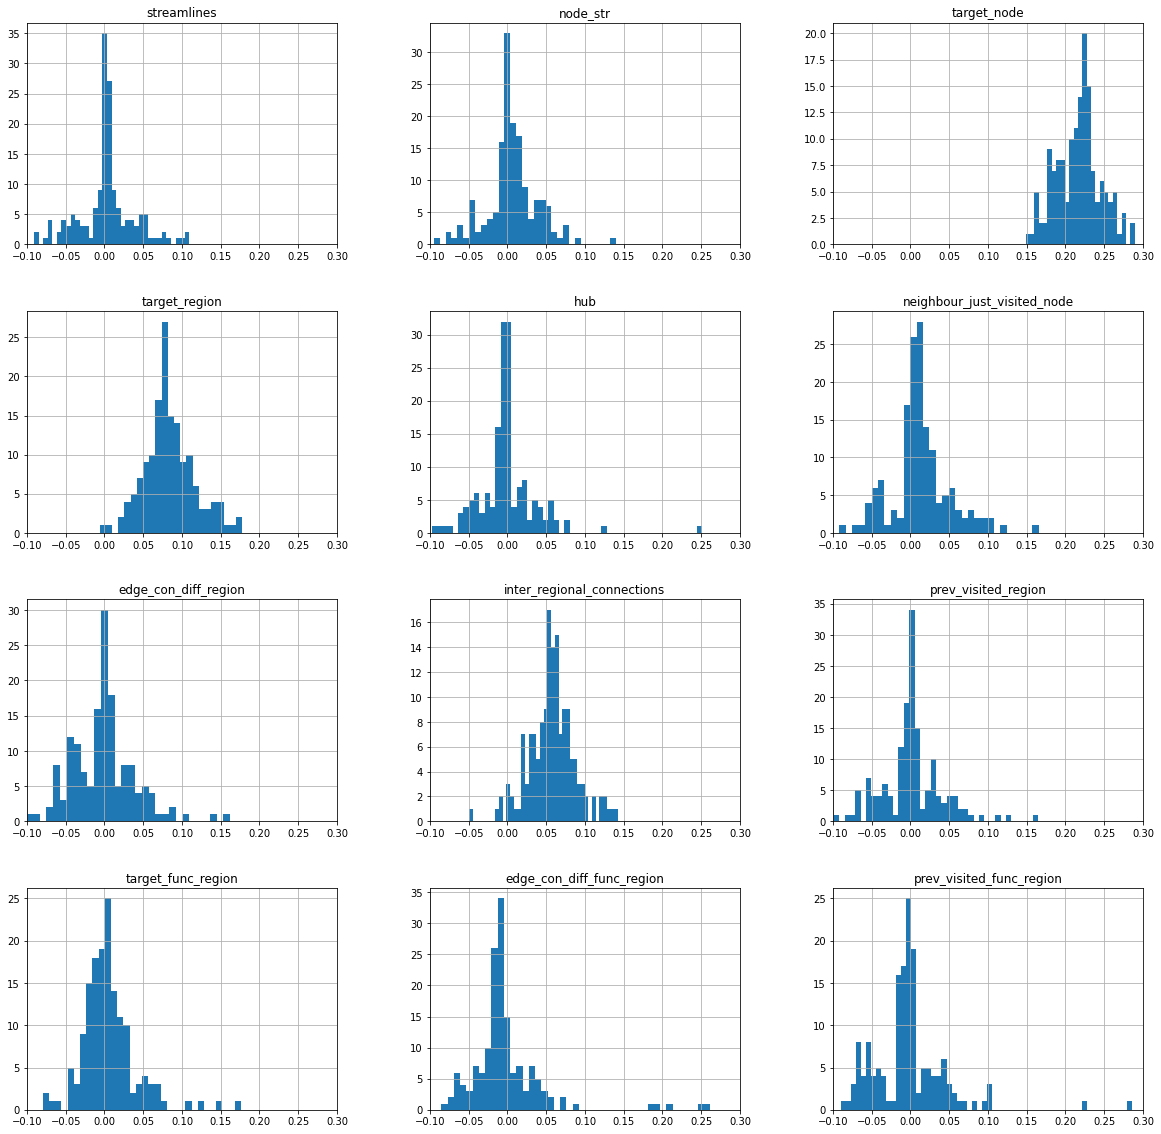

In [22]:
p1 = df.T.hist(figsize=(20,20),bins=300);
for p2 in p1:
    for p in p2:
        p.set_xlim([-0.1,0.3])

(-0.1, 0.3)

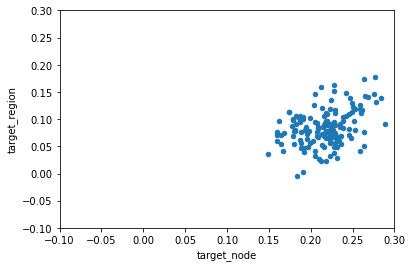

In [23]:
ps1 = df.T.plot.scatter(x='target_node',y='target_region')
ps1.set_xlim([-0.1,0.3])
ps1.set_ylim([-0.1,0.3])

/var/folders/vn/0jxbshdd183c2dnj6_0qkcpw0000gn/T/ipykernel_48913/8517968.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axarr = scatter_matrix(df.T, ax = plt.gca());


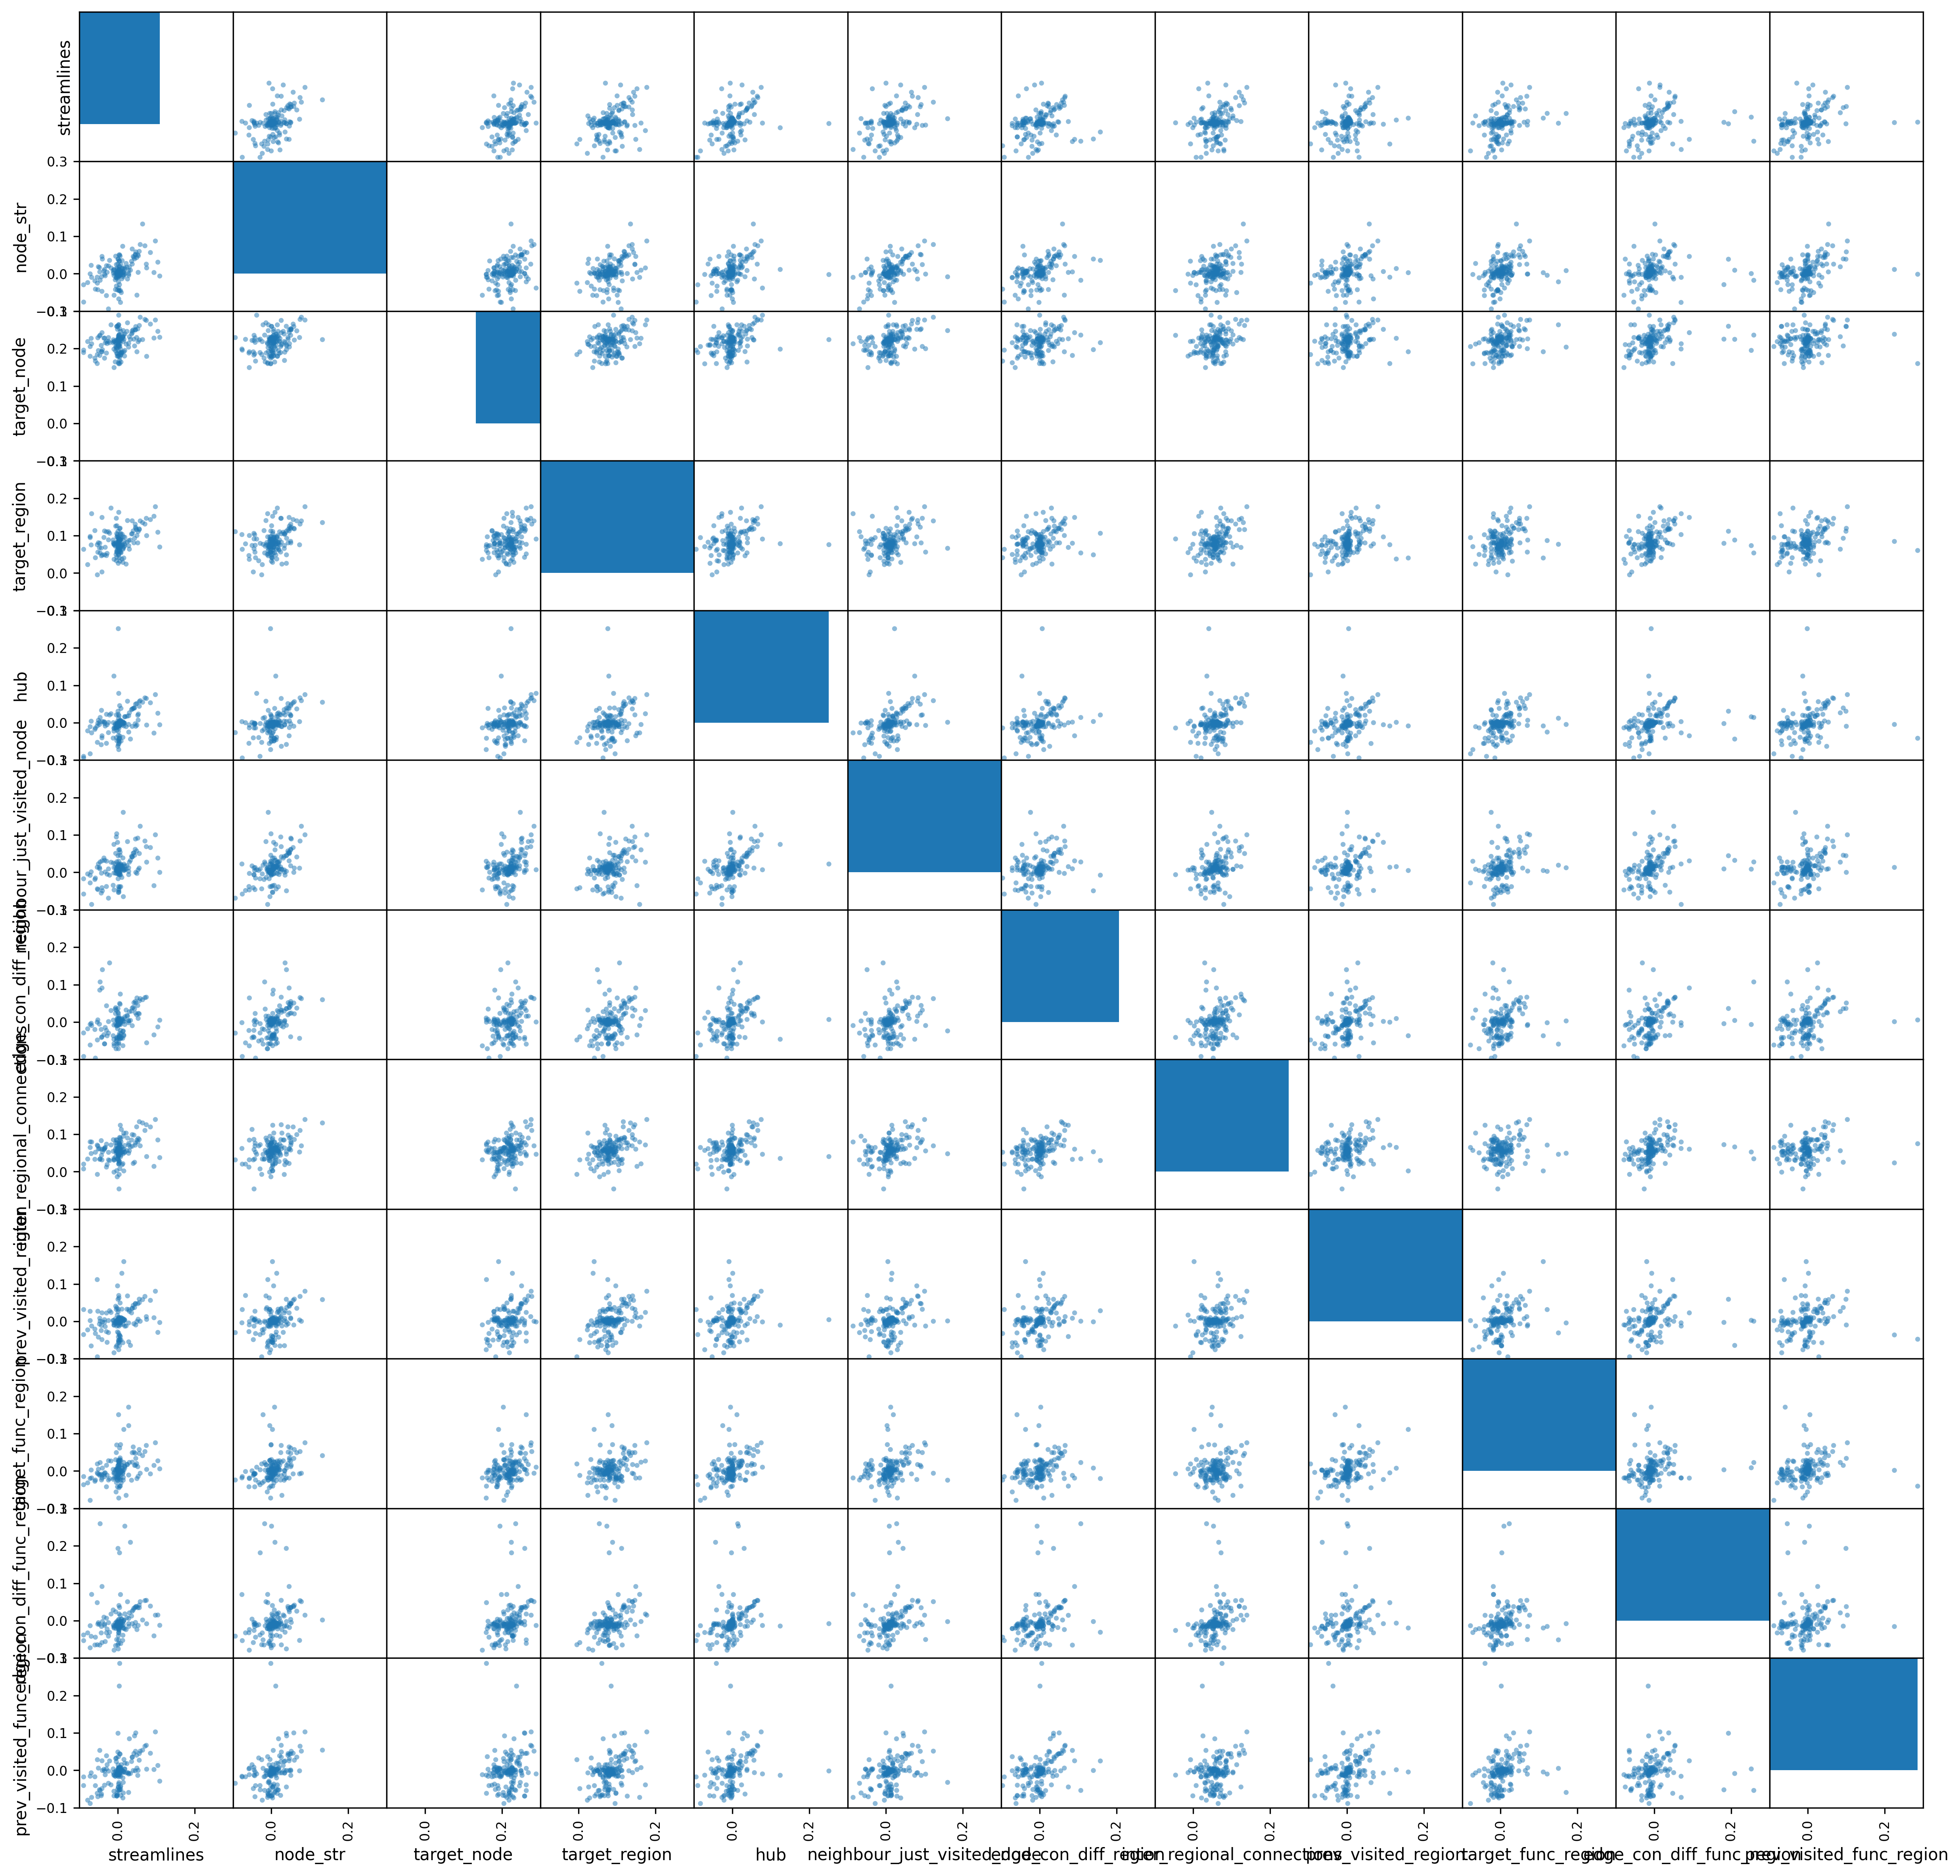

In [37]:
from pandas.plotting import scatter_matrix

fig = plt.figure(dpi=300, figsize=(20,20))
axarr = scatter_matrix(df.T, ax = plt.gca());
for i in range(12):
    for j in range(12):
        axarr[i,j].set_xlim(-0.1,0.3)
        axarr[i,j].set_ylim(-0.1,0.3)




In [ ]:
df_by_batch = df.stack(level=0)

In [ ]:
p1 = df_by_batch.T.hist(figsize=(20,20),bins=200);
for p2 in p1:
    for p in p2:
        p.set_xlim([-0.2,0.4])

In [ ]:
df_by_batch.T.describe().T

In [ ]:
results_brain = process_batch(99)

df = pd.DataFrame({key: {criteria[i-1] : results_brain[key][i] for i in range(1,13)} for key in results_brain})

df.T.hist()

In [ ]:
results_02 = compare_brain_by_batch(2)

df = pd.DataFrame({key: {criteria[i-1] : results_02[key][i] for i in range(1,13)} for key in results_02})

df.T.hist()

In [ ]:
df.T.hist(figsize=(20,15))

In [ ]:
os.path.isfile("blah")

In [ ]:
np.NaN